## Semester 1 Project Submission

Please fill out:
* Student name: Thomas Ramsay
* Instructor name: Nick McCarty and Julian Ward


## Appendix


* [***Relevant Questions***](#Relevant-Questions) 
* [***Data loading***](#Data-loading) 
* [***Data Visualization: Genres and Domestic Gross***](#Data-Visualization:-Genres-and-Domestic-Gross) 
* [***Is budget correlated with revenue?***](#Is-budget-correlated-with-revenue?)
* [***Which release date months have the best revenue?***](#Which-release-date-months-have-the-best-revenue?)
* [***Which Genres are most often combined?***](#Which-Genres-are-most-often-combined?)
* [***Correlation between rating and box office performance?***](#Correlation-between-rating-and-box-office-performance?)
* [***Do certain studios perform better at the box office?***](#Do-certain-studios-perform-better-at-the-box-office?)
* [***Data Visualization: Actors***](#Data-Visualization:-Actors)
* [***Is box office revenue correlated with profit?***](#Is-box-office-revenue-correlated-with-profit?)






### Relevant Questions

* What defines success? Domestic Gross? Worldwide Gross? Box office? Want to define specific goal to attack.
* Hypothesis: Critic reviews are correlated with revenue.
* Which genres are most popular this year/last few years?
* Which actors are most popular?
* Do certain actors negate negative reviews?
[Study: How Critical Are Critical Reviews?
The Box Office Effects of Film
Critics, Star Power, and Budgets](https://repository.yu.edu/bitstream/handle/20.500.12202/6664/Ravid%20Basuory%20How%20Critical%20jmkg.67.4.103.18692.pdf?sequence=1&isAllowed=y)
* Are certain key words in a synopsis correlated with high revenue or good reviews?
* Which directors and writers are most popular?
* Which movie ratings earn the most revenue?
* In movies df, what does "popularity" mean? How is it measured?
* What does vote average and vote count mean?
* In movie ratings df, what does average rating mean? What does num votes mean? How is it different from df above? Is it different?
* Is there any possibility of endogeneity? For example, does an actor make a movie good, or does that actor just get picked for good movies?
* Time of year correlated with movie performance
* Holidays correlated with movie performance
* Is there correlation between genre type frequency and average revenue of that genre type in a year? This could dictate whether or not we try to follow the trend of producing a movie of a popular genre.
* Do critics tend to like certain genres over others?
* Do top critics have a greater effect on movie revenue than non-top critics?
* Which studios perform best at the box office? Can we tell why?

More Relevant Papers:

[Study: A Machine Learning Approach to Predict Movie Box-Office Success](http://dspace.bracu.ac.bd/xmlui/bitstream/handle/10361/9015/13301028%2C13301019_CSE.pdf?sequence=1&isAllowed=y)

[Study: Predicting Movie Success with Machine Learning 
Techniques: Ways to Improve Accuracy](https://bura.brunel.ac.uk/bitstream/2438/18300/1/FullText.pdf)

[Study: A Predictor for Movie Success](http://cs229.stanford.edu/proj2013/EricsonGrodman-APredictorForMovieSuccess.pdf)

[New York Times Article: A Big Star May Not a Profitable Movie Make - The New York Times](https://www.nytimes.com/2006/08/28/business/media/28cast.html)

# Data Exploration

## Data loading

In [1]:
! ls

README.md
Thomas - Data Exploration.ipynb
zippedData


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 


![movie data erd](https://github.com/learn-co-curriculum/dsc-ai-academy-semester1-capstone/raw/main/movie_data_erd.jpeg)

In [3]:
# Connect imdb database
conn = sqlite3.connect('zippedData/im.db')

In [4]:
# use sql to pull in principals table
principals = pd.read_sql_query("SELECT * FROM principals", conn)
principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [5]:
#persons table from sql
persons = pd.read_sql_query("SELECT * FROM persons", conn)
persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [6]:
# look at the persons that have actor in their primary_profession
persons[persons['primary_profession'].str.contains('actor') == True]

,person_id,primary_name,birth_year,death_year,primary_profession
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
6,nm0063198,Bayou,NaN,NaN,actor
14,nm0066093,Ahmad Bedair,1945.0,NaN,"actor,miscellaneous"
15,nm0066163,Arnaud Bedouët,NaN,NaN,"actor,writer,director"
17,nm0066897,Mohammad-Ali Behboudi,1956.0,NaN,actor
...,...,...,...,...,...
606633,nm9985838,Anthony Simonetti,NaN,NaN,actor
606637,nm9989005,Jae-Hwan Kim,NaN,NaN,actor
606639,nm9989840,Mariya Shekaturova,NaN,NaN,actor
606641,nm9990047,Joseph Jackson,NaN,NaN,actor


In [7]:
#movie basics from sql
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
#find all of the different unique genres
unique_genres = movie_basics.genres.str.split(pat = ",", expand = True)
unique_genres = unique_genres.melt()
unique_genres = unique_genres.value.unique()
unique_genres

array(['Action', 'Biography', 'Drama', 'Comedy', 'Horror', 'Adventure',
       'Documentary', 'History', 'Animation', None, 'Crime', 'Sci-Fi',
       'Thriller', 'Fantasy', 'Mystery', 'Musical', 'Family', 'Western',
       'Romance', 'Sport', 'Adult', 'Music', 'News', 'Talk-Show',
       'Reality-TV', 'War', 'Game-Show', 'Short'], dtype=object)

In [9]:
# create a dataframe of all of the genres with repeating movies to represent movies as multiple genres

#define function that isolates all the movies that are a genre, then create a new column with the genre name
def genre_dataframe(genre):
    genre_dataframe = movie_basics[movie_basics['genres'].str.contains(genre) == True].copy()
    genre_dataframe['genre'] = genre
    return genre_dataframe

#empty dataframe
genres = pd.DataFrame()


#for loop that creates dataframes of all the movies that are each genre and concatenates them together, with repeating movies
for genre in unique_genres: 
    genre1 = genre_dataframe(str(genre))
    genres = pd.concat([genres, genre1], axis = 0)
    
genres.reset_index()    
genres.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action
20,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Action
27,tt0276568,To Chase a Million,To Chase a Million,2018,97.0,"Action,Drama",Action
33,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",Action
38,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Action


In [10]:
#movie ratings from sql
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
# Read in CSV and TSV files
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [12]:
#check how many null values there are
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [13]:
#movie details
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movies = movies.drop('Unnamed: 0', axis = 1)
movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [14]:
#movie budgets
movies_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
#check null values
movies_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [16]:
#movies info
movies_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep = '\t')
movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [17]:
movies_info = movies_info.dropna()
movies_info = movies_info.sort_values(by = ['box_office'], ascending = False)
movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1510,1944,"In the 3D action-comedy The Green Hornet, Brit...",PG-13,Action and Adventure|Comedy|Science Fiction an...,Michel Gondry,Evan Goldberg|Seth Rogen,"Jan 14, 2011","May 3, 2011",$,"98,000,000",119 minutes,Sony Pictures
1469,1890,A misplaced sausage and his savory friends emb...,R,Animation|Comedy,Conrad Vernon|Greg Tiernan,Kyle Hunter|Ariel Shaffir|Seth Rogen|Evan Gold...,"Aug 12, 2016","Nov 8, 2016",$,"97,661,826",89 minutes,Sony Pictures
816,1055,The grim futility of the war between Bosnia an...,R,Art House and International|Drama,Danis Tanovic,Danis Tanovic,"Dec 21, 2001","Apr 9, 2002",$,"948,054",98 minutes,United Artists Pictures
1016,1317,"For an awkward, self-conscious girl like Kiki,...",PG-13,Comedy|Drama|Romance,Joe Roth,Donna Roth|Billy Crystal|Peter Tolan,"Jul 20, 2001","Nov 13, 2001",$,"93,008,426",103 minutes,Columbia Pictures
1464,1884,What do you get when you mix fearless comedic ...,PG-13,Comedy,David Zucker,Craig Mazin|David Zucker,"Apr 14, 2006","Aug 15, 2006",$,"90,672,025",83 minutes,Weinstein Co.


In [18]:
#check null values
movies_info.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [19]:
#movie reviews
movies_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep = '\t', encoding='latin')
movies_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


# ANSWERING EXPLORATORY QUESTIONS:

## Data Visualization: Genres and Domestic Gross

In [20]:
# select specific columns and the join the movie_gross and genres dataframes

genres = genres[['primary_title', 'genre']]

domestic_gross = movie_gross[['title','domestic_gross', 'year']]

genres_gross = genres.merge(domestic_gross, how = 'left', left_on = 'primary_title', right_on = 'title')

genres_gross.head()

,primary_title,genre,title,domestic_gross,year
0,Sunghursh,Action,NaN,NaN,NaN
1,Foodfight!,Action,NaN,NaN,NaN
2,To Chase a Million,Action,NaN,NaN,NaN
3,Mortal Kombat,Action,NaN,NaN,NaN
4,Wazir,Action,Wazir,1100000.0,2016.0


In [21]:
#drop null values and isolate only the needed columns
genres_gross = genres_gross.dropna()
genres_gross = genres_gross[['genre', 'domestic_gross', 'year']]
genres_gross.head()

,genre,domestic_gross,year
4,Action,1100000.0,2016.0
6,Action,26300000.0,2014.0
7,Action,652300000.0,2015.0
8,Action,110800000.0,2015.0
9,Action,73100000.0,2012.0


In [22]:
#print the genres that have the most domestic gross revenue over the entire time period
top_genres = genres_gross[['genre', 'domestic_gross']].groupby(['genre']).mean()
top_genres.sort_values(by = 'domestic_gross', ascending = False)

,domestic_gross
genre,
Sci-Fi,1.083885e+08
Adventure,9.440941e+07
Animation,8.732619e+07
Action,5.841816e+07
Fantasy,5.277712e+07
Family,4.372936e+07
Sport,3.723851e+07
Comedy,3.378180e+07
Musical,2.899244e+07


In [23]:
#group by genre and year, used mean to control for number of movies released, could also use sum
new_genres_gross = genres_gross.groupby(['genre', 'year'], as_index = False)['domestic_gross'].mean()
new_genres_gross.head()

,genre,year,domestic_gross
0,Action,2010.0,6.291758e+07
1,Action,2011.0,4.545733e+07
2,Action,2012.0,5.145065e+07
3,Action,2013.0,5.534061e+07
4,Action,2014.0,6.488705e+07


In [24]:
#create function to plot the genres and their domestic gross revenue
def plot_genres(name):
    all_genres = new_genres_gross[new_genres_gross['genre'] == name]
    plt.plot(all_genres.year, all_genres.domestic_gross, label = name)

In [25]:
#create list of top grossing genres to declutter the plot
top_genres_list = ['Adventure', 'Action', 'Comedy', 'Drama', 'Sci-Fi', 'Thriller', 'Animation', 'Crime', 'Fantasy', 'Sport']

In [26]:
new_genres_gross.describe()

,year,domestic_gross
count,192.000000,1.920000e+02
mean,2013.984375,3.899985e+07
std,2.579575,3.502490e+07
min,2010.000000,7.240000e+04
25%,2012.000000,1.669014e+07
50%,2014.000000,2.597797e+07
75%,2016.000000,5.042229e+07
max,2018.000000,1.836667e+08


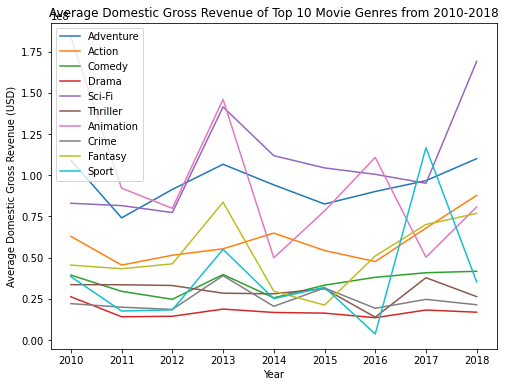

In [27]:
#create plot and call function to graph each of the top genres
plt.figure(figsize = (8,6))

for g in top_genres_list:
    plot_genres(g)

plt.title("Average Domestic Gross Revenue of Top 10 Movie Genres from 2010-2018")
plt.ylabel("Average Domestic Gross Revenue (USD)")
plt.xlabel('Year')

plt.legend()

plt.show()

## Is budget correlated with revenue?

In [28]:
movies_budgets[['production_budget', 'domestic_gross', 'worldwide_gross']] = movies_budgets[['production_budget', 'domestic_gross', 'worldwide_gross']].replace("[$,]", "", regex=True).astype(float)

In [29]:
movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


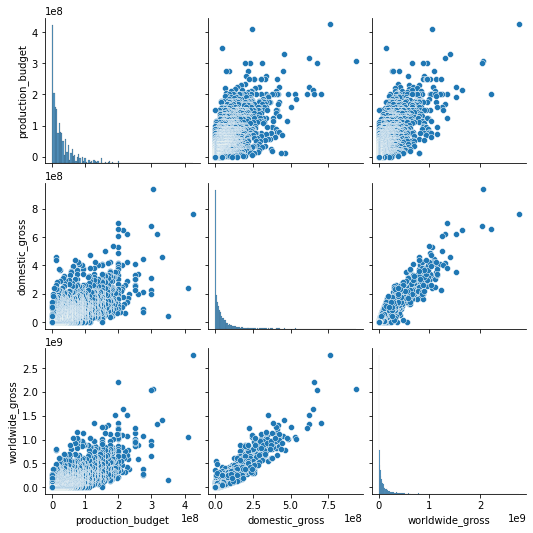

In [30]:
sns.pairplot(movies_budgets[['production_budget', 'domestic_gross', 'worldwide_gross']])

Intuitively, we would assume there would be a positive correlation between production budget and revenue. Maybe it is worth doing a hypothesis test to see if the relationship is statistically significant. Given it would be a simple linear regression, we should consider possible omitted variables.

## Which release date months have the best revenue?

In [31]:
#make release date into datetime, then create variable called release_month
movies_budgets['release_date'] = pd.to_datetime(movies_budgets['release_date'])
movies_budgets['release_month'] = movies_budgets['release_date'].dt.month
movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12


In [32]:
#create domestic and worldwide profits as the gross minus the budget
movies_budgets['domestic_profit'] = movies_budgets['domestic_gross'] - movies_budgets['production_budget']
movies_budgets['worldwide_profit'] = movies_budgets['worldwide_gross'] - movies_budgets['production_budget']
movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,domestic_profit,worldwide_profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,335507625.0,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,-169536125.0,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,-307237650.0,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,128405868.0,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,303181382.0,9.997217e+08


In [33]:
#check the range of dates 
movies_budgets['release_date'].sort_values()

5677   1915-02-08
5523   1916-09-05
5614   1916-12-24
5683   1920-09-17
5606   1925-11-19
          ...    
2329   2019-12-31
3312   2019-12-31
535    2020-02-21
1205   2020-12-31
194    2020-12-31
Name: release_date, Length: 5782, dtype: datetime64[ns]

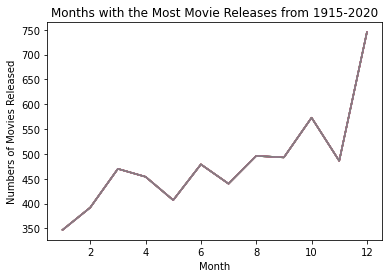

In [34]:
# months that have the most movie releases, from youtube
months = [month for month, df in movies_budgets.groupby('release_month')]

plt.plot(months, movies_budgets.groupby(['release_month']).count())

plt.title("Months with the Most Movie Releases from 1915-2020")
plt.ylabel("Numbers of Movies Released")
plt.xlabel('Month')

plt.show()

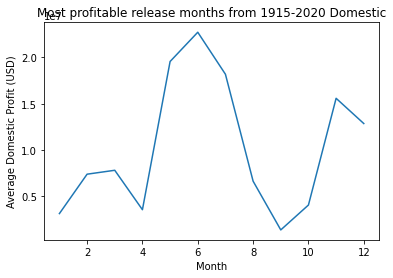

In [35]:
#use mean to control for number of movies released

plt.plot(months, movies_budgets.groupby(['release_month'])['domestic_profit'].mean())

plt.title("Most profitable release months from 1915-2020 Domestic")
plt.ylabel("Average Domestic Profit (USD)")
plt.xlabel('Month')

plt.show()

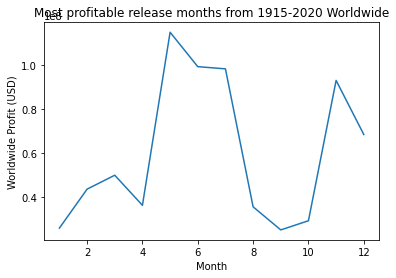

In [36]:
#use mean to control for number of movies released

plt.plot(months, movies_budgets.groupby(['release_month'])['worldwide_profit'].mean())

plt.title("Most profitable release months from 1915-2020 Worldwide")
plt.ylabel("Worldwide Profit (USD)")
plt.xlabel('Month')

plt.show()

## Which Genres are most often combined?

In [37]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [38]:
#from youtube, check the top genre combinations
from itertools import combinations
from collections import Counter

count = Counter()

grouped_genres = movie_basics['genres']

grouped_genres = grouped_genres.dropna()

grouped_genres = grouped_genres.astype(str)

for row in grouped_genres:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
print('Most common combined genres:')
for key, value in count.most_common(20):
    print(key, value)

Most common combined genres:
('Comedy', 'Drama') 7732
('Biography', 'Documentary') 6734
('Drama', 'Romance') 5146
('Documentary', 'Drama') 4607
('Documentary', 'History') 4403
('Drama', 'Thriller') 3903
('Comedy', 'Romance') 3580
('Crime', 'Drama') 3345
('Action', 'Drama') 2932
('Horror', 'Thriller') 2810
('Documentary', 'Music') 2492
('Drama', 'Family') 2345
('Biography', 'Drama') 2151
('Drama', 'Mystery') 2006
('Documentary', 'Family') 1976
('Action', 'Comedy') 1859
('Adventure', 'Documentary') 1839
('Action', 'Adventure') 1705
('Action', 'Crime') 1670
('Drama', 'Horror') 1604


## Correlation between rating and box office performance?

In [39]:
#check the heads of the relevant dataframes
movies_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [40]:
movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1510,1944,"In the 3D action-comedy The Green Hornet, Brit...",PG-13,Action and Adventure|Comedy|Science Fiction an...,Michel Gondry,Evan Goldberg|Seth Rogen,"Jan 14, 2011","May 3, 2011",$,"98,000,000",119 minutes,Sony Pictures
1469,1890,A misplaced sausage and his savory friends emb...,R,Animation|Comedy,Conrad Vernon|Greg Tiernan,Kyle Hunter|Ariel Shaffir|Seth Rogen|Evan Gold...,"Aug 12, 2016","Nov 8, 2016",$,"97,661,826",89 minutes,Sony Pictures
816,1055,The grim futility of the war between Bosnia an...,R,Art House and International|Drama,Danis Tanovic,Danis Tanovic,"Dec 21, 2001","Apr 9, 2002",$,"948,054",98 minutes,United Artists Pictures
1016,1317,"For an awkward, self-conscious girl like Kiki,...",PG-13,Comedy|Drama|Romance,Joe Roth,Donna Roth|Billy Crystal|Peter Tolan,"Jul 20, 2001","Nov 13, 2001",$,"93,008,426",103 minutes,Columbia Pictures
1464,1884,What do you get when you mix fearless comedic ...,PG-13,Comedy,David Zucker,Craig Mazin|David Zucker,"Apr 14, 2006","Aug 15, 2006",$,"90,672,025",83 minutes,Weinstein Co.


In [41]:
movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,domestic_profit,worldwide_profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,335507625.0,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,-169536125.0,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,-307237650.0,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,128405868.0,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,303181382.0,9.997217e+08


In [42]:
#what are the values in this column?
movies_reviews['fresh'].unique()

array(['fresh', 'rotten'], dtype=object)

In [43]:
#look at some ratings
movies_reviews['rating']

0          3/5
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
54427      NaN
54428      1/5
54429      2/5
54430    2.5/5
54431      3/5
Name: rating, Length: 54432, dtype: object

In [44]:
#drop null values
ratings = movies_reviews['rating'].dropna()

In [45]:
#what are the unique values?
ratings.unique()

array(['3/5', 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4', '6/10',
       '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-', '5/5',
       'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
       

In [46]:
movies_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [47]:
#create new dataframe of the id and positive/negative rating
rotten_tomatoes = movies_reviews[['id', 'fresh', 'top_critic']]

In [48]:
#create a df of 1 for fresh and 0 for rotten
rt_score = pd.get_dummies(rotten_tomatoes['fresh'], drop_first = False)
rt_score = rt_score.drop('rotten', axis = 1)
rt_score.head()

,fresh
0,1
1,0
2,1
3,1
4,1


In [49]:
#concatenate the fresh and rotten ratings with the movie id and top critic dummy
rotten_tomatoes = rotten_tomatoes.drop('fresh', axis = 1)
rotten_tomatoes = pd.concat([rotten_tomatoes, rt_score], axis = 1)
rotten_tomatoes.head()

,id,top_critic,fresh
0,3,0,1
1,3,0,0
2,3,0,1
3,3,0,1
4,3,0,1


In [50]:
#find the average 
rotten_tomatoes_all_critics = rotten_tomatoes[['id', 'fresh']].groupby(by = ['id']).mean()
rotten_tomatoes_all_critics.head()

,fresh
id,
3,0.631902
5,0.782609
6,0.561404
8,0.746667
10,0.462963


In [51]:
len(rotten_tomatoes_all_critics)

1135

In [52]:
movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,domestic_profit,worldwide_profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,335507625.0,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,-169536125.0,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,-307237650.0,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,128405868.0,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,303181382.0,9.997217e+08


In [53]:
movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [54]:
movies.sort_values(by = 'id')

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
117,"[18, 10402, 10749]",27,en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
23872,"[878, 9648, 12]",62,en,2001: A Space Odyssey,23.781,1968-04-10,2001: A Space Odyssey,8.0,5837
2510,"[28, 35, 80]",90,en,Beverly Hills Cop,15.067,1984-11-30,Beverly Hills Cop,7.1,1827
11109,"[80, 18, 9648, 53]",93,en,Anatomy of a Murder,12.710,1959-07-01,Anatomy of a Murder,7.9,359
32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267
...,...,...,...,...,...,...,...,...,...
26037,[35],607044,en,The Penguins of Madagascar: Operation N-W.O.R.D.,0.840,2018-10-16,The Penguins of Madagascar: Operation N-W.O.R.D.,8.0,1
15496,[],607721,en,Adventures of a Pizza Guy,1.483,2015-05-30,Adventures of a Pizza Guy,6.0,1
26107,"[53, 9648, 80]",607777,en,Door to Door,0.706,2018-12-10,Door to Door,10.0,1
25922,[99],608079,en,Trickle Down Town,1.176,2018-10-21,Trickle Down Town,6.0,1


In [55]:
len(movies)

26517

In [56]:
rotten_tomatoes_all_critics = rotten_tomatoes_all_critics.merge(movies[['id', 'title']], how = 'inner', on = 'id')
rotten_tomatoes_all_critics.head()

,id,fresh,title
0,93,0.966667,Anatomy of a Murder
1,95,0.688000,Armageddon
2,221,0.250000,Rebel Without a Cause
3,280,0.500000,Terminator 2: Judgment Day
4,280,0.500000,Terminator 2: Judgment Day


In [57]:
len(rotten_tomatoes_all_critics)

23

In [58]:
#join all critics with movie budgets on the id
rotten_tomatoes_all_critics = movies_budgets.merge(rotten_tomatoes_all_critics, how = 'inner', left_on = 'movie', right_on = 'title')

In [59]:
rotten_tomatoes_all_critics.head()

,id_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,domestic_profit,worldwide_profit,id_y,fresh,title
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,-169536125.0,635063875.0,1865,0.664430,Pirates of the Caribbean: On Stranger Tides
1,31,2012-07-03,The Amazing Spider-Man,220000000.0,262030663.0,7.578903e+08,7,42030663.0,537890267.0,1930,0.714286,The Amazing Spider-Man
2,8,1998-07-01,Armageddon,140000000.0,201578182.0,5.546000e+08,7,61578182.0,414600000.0,95,0.688000,Armageddon
3,10,2011-07-22,Captain America: The First Avenger,140000000.0,176654505.0,3.705698e+08,7,36654505.0,230569776.0,1771,0.888889,Captain America: The First Avenger
4,65,1991-07-02,Terminator 2: Judgment Day,100000000.0,203464105.0,5.154198e+08,7,103464105.0,415419827.0,280,0.500000,Terminator 2: Judgment Day


In [60]:
len(rotten_tomatoes_all_critics)

15

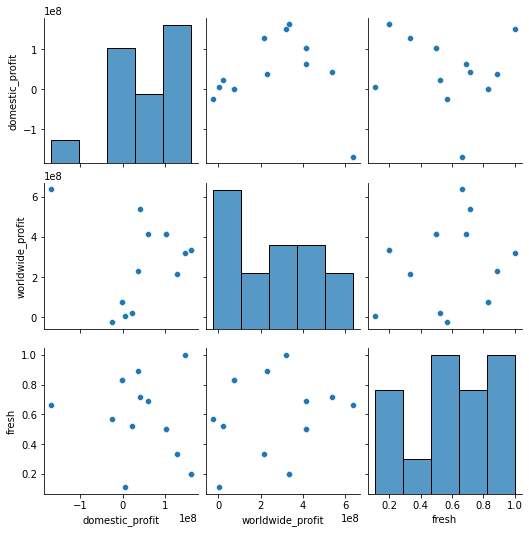

In [61]:
#plot scatterplots to investigate correlation
sns.pairplot(rotten_tomatoes_all_critics[[ 'domestic_profit', 'worldwide_profit', 'fresh']])

No correlation with percentage of positive ratings and profit? There are more positive reviews overall

Don't know if the ids are correct and even if they are, there aren't enough data points to make a meaningful conclusion.

#### Now investigating the correlation between ratings of top critics and profit

In [62]:
rotten_tomatoes.head()

,id,top_critic,fresh
0,3,0,1
1,3,0,0
2,3,0,1
3,3,0,1
4,3,0,1


In [63]:
#Keep working below

In [64]:
#isolate just the reviews from the top critics
rotten_tomatoes_top_critics = rotten_tomatoes[rotten_tomatoes['top_critic'] == 1]
rotten_tomatoes_top_critics.head()

,id,top_critic,fresh
24,3,1,0
47,3,1,0
50,3,1,0
54,3,1,0
55,3,1,0


In [65]:
# find the average of top critics positive ratings
rotten_tomatoes_top_critics = rotten_tomatoes_top_critics[['id', 'fresh']].groupby(by = ['id']).mean()
rotten_tomatoes_top_critics.head()

,fresh
id,
3,0.500000
5,0.200000
6,0.473684
8,0.727273
10,0.428571


In [66]:
rotten_tomatoes_top_critics = rotten_tomatoes_top_critics.merge(movies[['id', 'title']], how = 'inner', on = 'id')
rotten_tomatoes_top_critics.head()

,id,fresh,title
0,93,1.000000,Anatomy of a Murder
1,95,0.740741,Armageddon
2,221,0.666667,Rebel Without a Cause
3,311,0.000000,Once Upon a Time in America
4,387,1.000000,Das Boot


In [67]:
len(rotten_tomatoes_top_critics)

18

In [68]:
#join all critics with movie budgets on the id
rotten_tomatoes_top_critics = movies_budgets.merge(rotten_tomatoes_top_critics, left_on = 'movie', right_on = 'title')

In [69]:
len(rotten_tomatoes_top_critics)

12

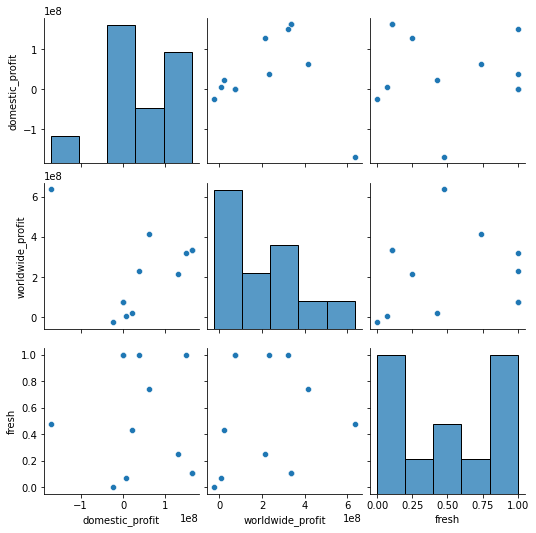

In [70]:
#plot scatterplots to investigate correlation
sns.pairplot(rotten_tomatoes_top_critics[[ 'domestic_profit', 'worldwide_profit', 'fresh']])

Top critics are less biased towards giving positive reviews. There still doesn't seem to be a correlation between positive reviews and profit. Most reviews are either very negative or very positive. Also, worldwide profit looks to be skewed right.

## Do certain studios perform better at the box office?

In [71]:
movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1510,1944,"In the 3D action-comedy The Green Hornet, Brit...",PG-13,Action and Adventure|Comedy|Science Fiction an...,Michel Gondry,Evan Goldberg|Seth Rogen,"Jan 14, 2011","May 3, 2011",$,"98,000,000",119 minutes,Sony Pictures
1469,1890,A misplaced sausage and his savory friends emb...,R,Animation|Comedy,Conrad Vernon|Greg Tiernan,Kyle Hunter|Ariel Shaffir|Seth Rogen|Evan Gold...,"Aug 12, 2016","Nov 8, 2016",$,"97,661,826",89 minutes,Sony Pictures
816,1055,The grim futility of the war between Bosnia an...,R,Art House and International|Drama,Danis Tanovic,Danis Tanovic,"Dec 21, 2001","Apr 9, 2002",$,"948,054",98 minutes,United Artists Pictures
1016,1317,"For an awkward, self-conscious girl like Kiki,...",PG-13,Comedy|Drama|Romance,Joe Roth,Donna Roth|Billy Crystal|Peter Tolan,"Jul 20, 2001","Nov 13, 2001",$,"93,008,426",103 minutes,Columbia Pictures
1464,1884,What do you get when you mix fearless comedic ...,PG-13,Comedy,David Zucker,Craig Mazin|David Zucker,"Apr 14, 2006","Aug 15, 2006",$,"90,672,025",83 minutes,Weinstein Co.


In [72]:
#check to see that all currency types are "$"
movies_info['currency'].unique()

array(['$'], dtype=object)

In [73]:
#change the box_office into a float
movies_info['box_office'] = movies_info['box_office'].replace(",", "", regex=True).astype(float)

In [74]:
#check to see unique studios
movies_info['studio'].unique()

array(['Sony Pictures', 'United Artists Pictures', 'Columbia Pictures',
       'Weinstein Co.', 'The Weinstein Co.', 'Summit Premiere',
       'Paramount Vantage', 'WB', 'IFC Films', 'MGM', '20th Century Fox',
       'Warner Bros.', 'First Run Features', 'Touchstone Pictures',
       'The Weinstein Company', 'Warner Bros. Pictures',
       'Sony Pictures Classics', 'Miramax Films', 'Walt Disney Pictures',
       'Dreamworks Pictures', 'Paramount Pictures', 'Focus Features',
       'Universal Pictures', 'Entertainment One',
       'Fox Searchlight Pictures', 'IDP Distribution',
       'Roadside Attractions', 'Sony Pictures Releasing',
       'Crane Movie Company', 'Lakeshore Entertainment',
       'New Line Cinema', 'Summit Entertainment',
       'Sony Pictures Entertainment', 'Magnolia Pictures', 'USA Films',
       'Open Road Films', 'Samuel Goldwyn Films', 'Regent Releasing',
       'Buena Vista Distribution Compa', 'Sony Pictures/TriStar Pictures',
       'Variance Films', 'Tribeca 

In [75]:
studios = movies_info['studio']
studios.head()

1510              Sony Pictures
1469              Sony Pictures
816     United Artists Pictures
1016          Columbia Pictures
1464              Weinstein Co.
Name: studio, dtype: object

In [76]:
#rename duplicate studios to be the same

#don't show warning because I know what I am doing lol
import warnings
warnings.filterwarnings('ignore')

#rename studios that are the same with different names in the dataset
studios[studios.str.contains('Weinstein')] = 'Weinstein Co.'

studios[studios.str.contains('Sony|SONY|Columbia')] = 'Sony Pictures'

studios[studios.str.contains('Universal|Dreamworks|DreamWorks')] = 'Universal Studios'

#universal owns dreamworks
#studios[studios.str.contains('Dreamworks|DreamWorks')] = 'Dreamworks Pictures'

studios[studios.str.contains('Warner|WARNER|WB|New Line Cinema')] = 'Warner Bros'

studios[studios.str.contains('Paramount|CBS')] = 'Paramount Studios'

studios[studios.str.contains('Lions')] = 'Lions Gate Films'

studios[studios.str.contains('A24')] = 'A24 Films'

studios[studios.str.contains('MGM|Goldwyn')] = 'MGM'

studios[studios.str.contains('Touchstone|Fox')] = 'Walt Disney Pictures'

studios[studios.str.contains('IFC')] = 'IFC Films'

In [77]:
#check that the studios aren't duplicated anymore
studios.unique()

array(['Sony Pictures', 'United Artists Pictures', 'Weinstein Co.',
       'Summit Premiere', 'Paramount Studios', 'Warner Bros', 'IFC Films',
       'MGM', 'Walt Disney Pictures', 'First Run Features',
       'Miramax Films', 'Universal Studios', 'Focus Features',
       'Entertainment One', 'IDP Distribution', 'Roadside Attractions',
       'Crane Movie Company', 'Lakeshore Entertainment',
       'Summit Entertainment', 'Magnolia Pictures', 'USA Films',
       'Open Road Films', 'Regent Releasing',
       'Buena Vista Distribution Compa', 'Variance Films', 'Tribeca Film',
       'Apparition Films', 'Film District', 'First Independent Pictures',
       'Newmarket Film Group', 'Lorber Films', 'Lions Gate Films',
       'Aspiration Media', 'Wrekin Hill Entertainment', 'Dimension Films',
       'Fingerprint Releasing / Bleecker Street', 'Film 44',
       'Indican Pictures', 'Monterey Media', 'Relativity Media',
       'Fine Line Features', 'Film Foundry Releasing', 'TriStar Pictures',
  

There are some duplicate studios

In [78]:
#put the changes to the studios into the movies_info df
movies_info['studio'] = studios
movies_info['studio'].unique()

array(['Sony Pictures', 'United Artists Pictures', 'Weinstein Co.',
       'Summit Premiere', 'Paramount Studios', 'Warner Bros', 'IFC Films',
       'MGM', 'Walt Disney Pictures', 'First Run Features',
       'Miramax Films', 'Universal Studios', 'Focus Features',
       'Entertainment One', 'IDP Distribution', 'Roadside Attractions',
       'Crane Movie Company', 'Lakeshore Entertainment',
       'Summit Entertainment', 'Magnolia Pictures', 'USA Films',
       'Open Road Films', 'Regent Releasing',
       'Buena Vista Distribution Compa', 'Variance Films', 'Tribeca Film',
       'Apparition Films', 'Film District', 'First Independent Pictures',
       'Newmarket Film Group', 'Lorber Films', 'Lions Gate Films',
       'Aspiration Media', 'Wrekin Hill Entertainment', 'Dimension Films',
       'Fingerprint Releasing / Bleecker Street', 'Film 44',
       'Indican Pictures', 'Monterey Media', 'Relativity Media',
       'Fine Line Features', 'Film Foundry Releasing', 'TriStar Pictures',
  

In [79]:
#make theater_date into datetime, then create variable called theater_month
movies_info['theater_date'] = pd.to_datetime(movies_info['theater_date'])
movies_info['theater_release_year'] = movies_info['theater_date'].dt.year
movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,theater_release_year
1510,1944,"In the 3D action-comedy The Green Hornet, Brit...",PG-13,Action and Adventure|Comedy|Science Fiction an...,Michel Gondry,Evan Goldberg|Seth Rogen,2011-01-14,"May 3, 2011",$,98000000.0,119 minutes,Sony Pictures,2011
1469,1890,A misplaced sausage and his savory friends emb...,R,Animation|Comedy,Conrad Vernon|Greg Tiernan,Kyle Hunter|Ariel Shaffir|Seth Rogen|Evan Gold...,2016-08-12,"Nov 8, 2016",$,97661826.0,89 minutes,Sony Pictures,2016
816,1055,The grim futility of the war between Bosnia an...,R,Art House and International|Drama,Danis Tanovic,Danis Tanovic,2001-12-21,"Apr 9, 2002",$,948054.0,98 minutes,United Artists Pictures,2001
1016,1317,"For an awkward, self-conscious girl like Kiki,...",PG-13,Comedy|Drama|Romance,Joe Roth,Donna Roth|Billy Crystal|Peter Tolan,2001-07-20,"Nov 13, 2001",$,93008426.0,103 minutes,Sony Pictures,2001
1464,1884,What do you get when you mix fearless comedic ...,PG-13,Comedy,David Zucker,Craig Mazin|David Zucker,2006-04-14,"Aug 15, 2006",$,90672025.0,83 minutes,Weinstein Co.,2006


In [80]:
#check for null values
movies_info[['studio', 'box_office', 'theater_release_year']].isna().sum()

studio                  0
box_office              0
theater_release_year    0
dtype: int64

In [81]:
#print the studios that have the most mean box office revenue since 2000
movies_info_2000 = movies_info[movies_info['theater_release_year'] >= 2000]
top_studios = movies_info_2000[['studio', 'box_office']].groupby(['studio']).sum()
top_studios = top_studios.sort_values(by = 'box_office', ascending = False).reset_index().head(10)
top_studios

,studio,box_office
0,Universal Studios,2.400307e+09
1,Sony Pictures,1.753255e+09
2,Walt Disney Pictures,1.306565e+09
3,Warner Bros,1.188400e+09
4,Paramount Studios,1.050292e+09
5,MGM,4.202448e+08
6,Newmarket Film Group,4.021878e+08
7,Lions Gate Films,2.665773e+08
8,IFC Films,2.451889e+08
9,Weinstein Co.,1.581774e+08


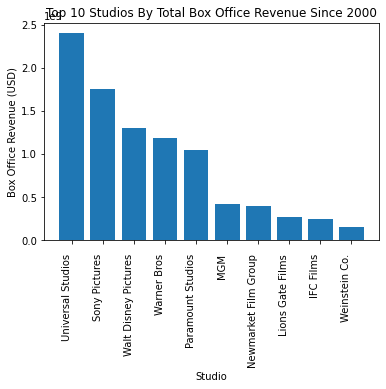

In [82]:
#bar plot of top movies
fig, axs = plt.subplots()

axs.bar(top_studios['studio'],
         top_studios['box_office'])
axs.set_title('Top 10 Studios By Total Box Office Revenue Since 2000')
axs.set_xlabel('Studio')
axs.set_ylabel('Box Office Revenue (USD)')
axs.set_xticklabels(top_studios['studio'], rotation=90,  va='top', ha='right')
axs.tick_params(axis="x", direction="out", pad=10)

In [83]:
#group by studio and year, used mean to control for number of movies released, could also use sum
new_studios = movies_info_2000.groupby(['studio', 'theater_release_year'], as_index = False)['box_office'].mean()
new_studios.head()

,studio,theater_release_year,box_office
0,A24 Films,2013,13900000.0
1,A24 Films,2017,13985117.0
2,ATO Pictures,2010,1039869.0
3,Apparition Films,2009,4341275.0
4,Aspiration Media,2015,347321.0


In [84]:
#create function to plot the genres and their domestic gross revenue
def plot_studios(name):
    studios = new_studios[new_studios['studio'] == name]
    plt.plot(studios.theater_release_year, studios.box_office, label = name)

In [85]:
#create a list of the top studios found above
top_studios_list = list(top_studios['studio'])

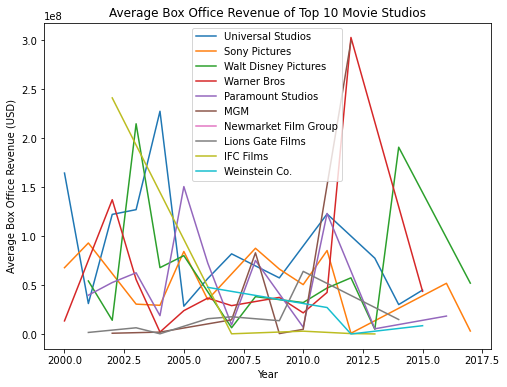

In [86]:
#create plot and call function to graph each of the top studios
plt.figure(figsize = (8,6))

for studio in top_studios_list:
    plot_studios(studio)

plt.title("Average Box Office Revenue of Top 10 Movie Studios")
plt.ylabel("Average Box Office Revenue (USD)")
plt.xlabel('Year')

plt.legend()

plt.show()

Not going to use the above graph because in order to get a more accurate representation I would likely have to continue merging companies with their parent companies.

## Data Visualization: Actors

* note that actors dataset connects actors to movies they are "known for" meaning it may bias towards positive movie performance

In [87]:
#find all of the different unique categories
principals.category.unique()

array(['actor', 'director', 'producer', 'editor', 'actress', 'composer',
       'cinematographer', 'writer', 'self', 'production_designer',
       'archive_footage', 'archive_sound'], dtype=object)

In [88]:
#join principals and persons on person id
actors = principals.merge(persons, how = 'inner', on = 'person_id')

In [89]:
#what are the categories?
actors.category.unique()

array(['actor', 'director', 'producer', 'editor', 'actress', 'self',
       'composer', 'cinematographer', 'writer', 'archive_footage',
       'production_designer', 'archive_sound'], dtype=object)

In [90]:
#isolate actors and actresses
actors = actors[actors['category'].str.contains('actor|actress') == True].copy()
actors.head()

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]",Tommy Dysart,NaN,NaN,actor
11,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack"
12,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]",Henry Garrett,NaN,NaN,actor
13,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.0,NaN,"actor,soundtrack,director"
14,tt1680140,2,nm0574615,actor,None,"[""Bully""]",Graham McTavish,1961.0,NaN,"actor,soundtrack,director"


## Is box office revenue correlated with profit?
* New York times article: "Stars help to launch a film. They are meant as signals to create a big opening ... But they can’t make a film have legs.”


In [91]:
#the dropped values are the ones that didn't have box office numbers
movies_info.sort_values(by = 'id').head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,theater_release_year
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,2012
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002-01-11,"Jun 18, 2002",$,41032915.0,82 minutes,Paramount Studios,2002
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006-04-27,"Oct 2, 2007",$,224114.0,123 minutes,Sony Pictures,2006
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,2010-12-17,"Apr 5, 2011",$,1039869.0,108 minutes,ATO Pictures,2010
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,2013-12-25,"Apr 1, 2014",$,20518224.0,127 minutes,Universal Studios,2013


In [92]:
movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,domestic_profit,worldwide_profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,335507625.0,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,-169536125.0,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,-307237650.0,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,128405868.0,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,303181382.0,9.997217e+08


In [93]:
movies_box_office_vs_profit = movies_budgets.merge(movies_info[['id', 'box_office']], how = 'inner', on = 'id')
movies_box_office_vs_profit.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,domestic_profit,worldwide_profit,box_office
0,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,149762350.0,6,-307237650.0,-200237650.0,600000.0
1,3,2018-11-21,Ralph Breaks The Internet,175000000.0,201091711.0,524283695.0,11,26091711.0,349283695.0,600000.0
2,3,2005-04-08,Sahara,145000000.0,68671925.0,121671925.0,4,-76328075.0,-23328075.0,600000.0
3,3,2018-10-05,Venom,116000000.0,213511408.0,853628605.0,10,97511408.0,737628605.0,600000.0
4,3,2005-02-18,Son of the Mask,100000000.0,17018422.0,59918422.0,2,-82981578.0,-40081578.0,600000.0
